# Keras.Регрессия

Задача регрессии - хотим предсказать значение непрерывной числовой переменной

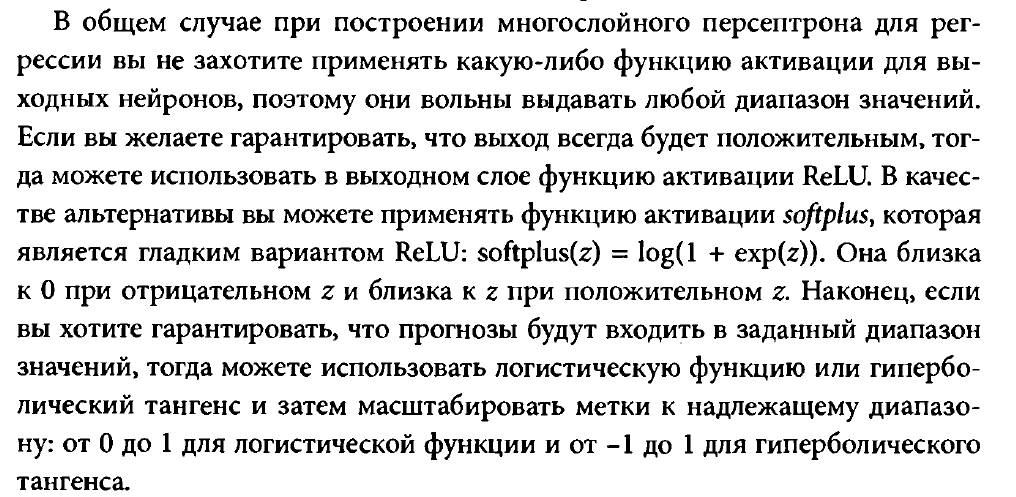

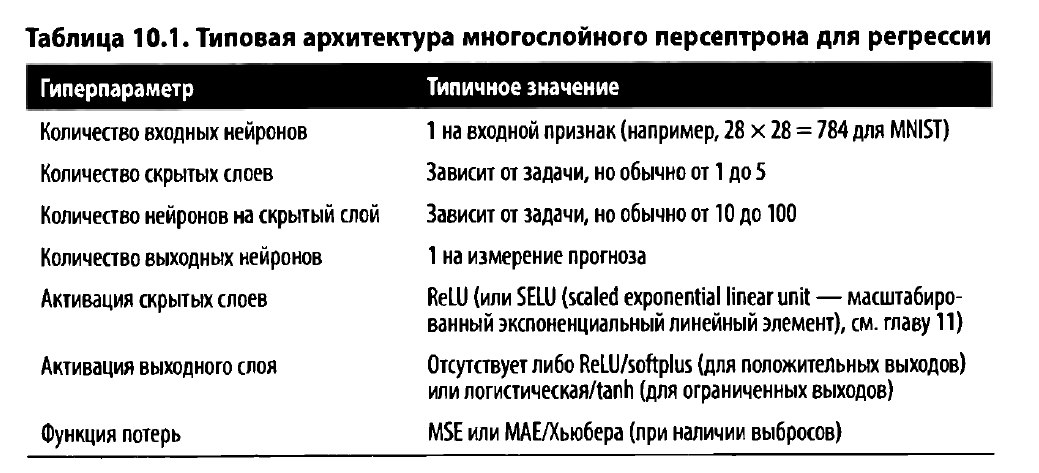

## Keras

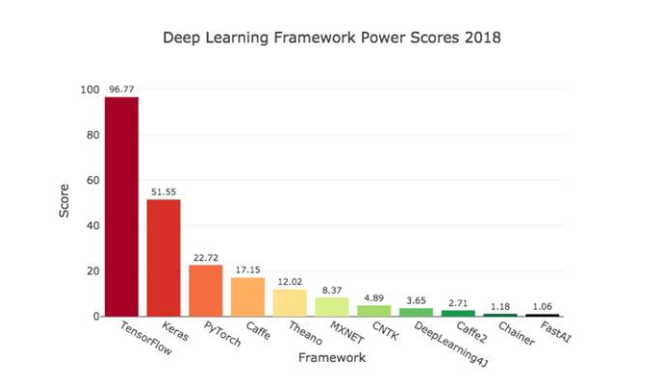

Как видим, по состоянию на 2018 год лидером является TensorFlow, разработанный компанией Google, специально для создания сетей самой разной структуры. Кроме того, TensorFlow позволяет проводить обучение на графических процессорах (GPU), компьютеров объединенных в сеть. Это значительно повышает скорость работы алгоритмов. Но TensorFlow – относительно низкоуровневый фреймворк. Проектировать на нем НС все равно, что писать программу на ассемблере (машинном коде), вместо того, чтобы воспользоваться языками высокого уровня. Как раз другие фреймворки из диаграммы и являются, своего рода, такими языками. Они значительно упрощают процесс проектирования нейросетей. И, в частности, один из самых популярных пакетов Keras является некой надстройкой, оболочкой над TensorFlow

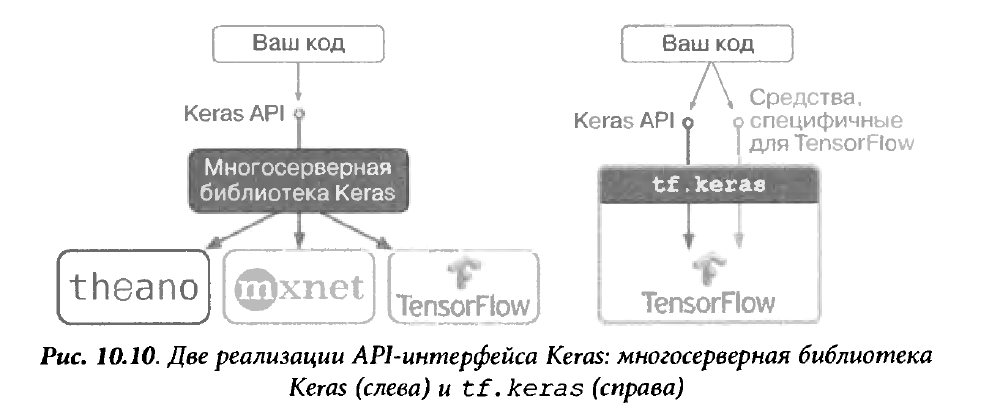

Keras создавалась как гибкая модульная библиотека, которую легко настраивать и модифицировать. Она бесплатная, у нее открытый исходный код, который может посмотреть любой желающий.

Название читается как «Керас» и с греческого языка означает «рог». Это отсылка к строкам из «Одиссеи».

In [ ]:
from tensorflow import keras #pip install tensorflow
import tensorflow as tf

## Данные - студенты

In [ ]:
import pandas as pd
studs = pd.read_csv('/content/studs.csv',sep=';',encoding='Windows-1251')
studs.head()

,sex,age,ege_rus,ege_math,ege_common,ege_history,ege_physics,ege_eng,ege_informatika,ege_biology,...,ege_physics_exists,ege_eng_exists,ege_informatika_exists,ege_biology_exists,ege_literature_exists,ege_geography_exists,ege_chemistry_exists,is_budzet_enter,avg_point1,y
0,0,18.янв,70,56,66,0,0,65,0,0,...,0,1,0,0,1,0,0,1,89.888888,1
1,1,18.мар,53,36,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,78.250000,1
2,0,18.апр,70,80,72,0,0,83,0,0,...,0,1,0,0,0,0,0,1,86.000000,1
3,1,18.апр,79,63,75,0,0,69,0,0,...,0,1,0,0,0,0,0,1,87.888888,1
4,0,17.сен,66,70,78,0,0,0,0,0,...,0,0,0,0,0,0,0,1,91.000000,1


In [ ]:
studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sex                     4974 non-null   int64  
 1   age                     4974 non-null   object 
 2   ege_rus                 4974 non-null   int64  
 3   ege_math                4974 non-null   int64  
 4   ege_common              4974 non-null   int64  
 5   ege_history             4974 non-null   int64  
 6   ege_physics             4974 non-null   int64  
 7   ege_eng                 4974 non-null   int64  
 8   ege_informatika         4974 non-null   int64  
 9   ege_biology             4974 non-null   int64  
 10  ege_literature          4974 non-null   int64  
 11  ege_geography           4974 non-null   int64  
 12  ege_chemistry           4974 non-null   int64  
 13  ege_rus_exists          4974 non-null   int64  
 14  ege_math_exists         4974 non-null   

In [ ]:
studs['age'] = studs['age'].str.extract('(\d+)').astype(int)
studs.head()

,sex,age,ege_rus,ege_math,ege_common,ege_history,ege_physics,ege_eng,ege_informatika,ege_biology,...,ege_physics_exists,ege_eng_exists,ege_informatika_exists,ege_biology_exists,ege_literature_exists,ege_geography_exists,ege_chemistry_exists,is_budzet_enter,avg_point1,y
0,0,18,70,56,66,0,0,65,0,0,...,0,1,0,0,1,0,0,1,89.888888,1
1,1,18,53,36,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,78.250000,1
2,0,18,70,80,72,0,0,83,0,0,...,0,1,0,0,0,0,0,1,86.000000,1
3,1,18,79,63,75,0,0,69,0,0,...,0,1,0,0,0,0,0,1,87.888888,1
4,0,17,66,70,78,0,0,0,0,0,...,0,0,0,0,0,0,0,1,91.000000,1


## Создание модели

In [ ]:
from sklearn.preprocessing import StandardScaler
X=studs.drop(['avg_point1','y'],axis=1)
Y=studs['avg_point1']

In [ ]:
X.sex = pd.Categorical(X.sex)
X['sex'] = X.sex.cat.codes
X.is_budzet_enter = pd.Categorical(X.is_budzet_enter)
X['is_budzet_enter'] = X.is_budzet_enter.cat.codes

In [ ]:
scal_X = StandardScaler().fit_transform(X)
scal_X = pd.DataFrame(scal_X, columns=X.columns)

In [ ]:
#разделение выборок
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

[Логика разбиения](https://avatars.mds.yandex.net/i?id=481544700476288be7529c7da8faaf5c69655240-6942344-images-thumbs&n=13)

In [ ]:
#создание модели с помощью Sequential
model = keras.models.Sequential()

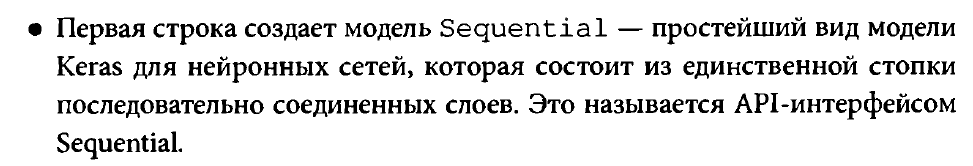

In [ ]:
X_train.shape[1:]

(25,)

In [ ]:
#добавляем слои в модель

model.add(keras.layers.Dense(20,activation='relu',input_shape=X_train.shape[1:])),
model.add(keras.layers.Dense(40,activation='relu'))
model.add(keras.layers.Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                520       
                                                                 
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1401 (5.47 KB)
Trainable params: 1401 (5.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#получить параметры скрытого слоя
hidden0 = model.layers[0]
weights,biases = hidden0.get_weights()

In [ ]:
weights.shape

(25, 41)

In [ ]:
#компилируем модель
model.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse'])

про оптимизаторы - https://habr.com/ru/companies/skillfactory/articles/552394/

In [ ]:
#обучение модели
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
100/100 [==============================] - 1s 4ms/step - loss: 1278.5704 - mse: 1278.5704 - val_loss: 272.2182 - val_mse: 272.2182
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 280.3492 - mse: 280.3492 - val_loss: 240.4432 - val_mse: 240.4432
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 260.5768 - mse: 260.5768 - val_loss: 238.9718 - val_mse: 238.9718
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 255.8284 - mse: 255.8284 - val_loss: 232.2095 - val_mse: 232.2095
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 249.6372 - mse: 249.6372 - val_loss: 223.5307 - val_mse: 223.5307
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 244.7914 - mse: 244.7914 - val_loss: 221.2555 - val_mse: 221.2555
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 242.7102 - mse: 242.7102 - val_loss: 221.9898 - val_mse: 221.9898
Epoch 8/20
100/100

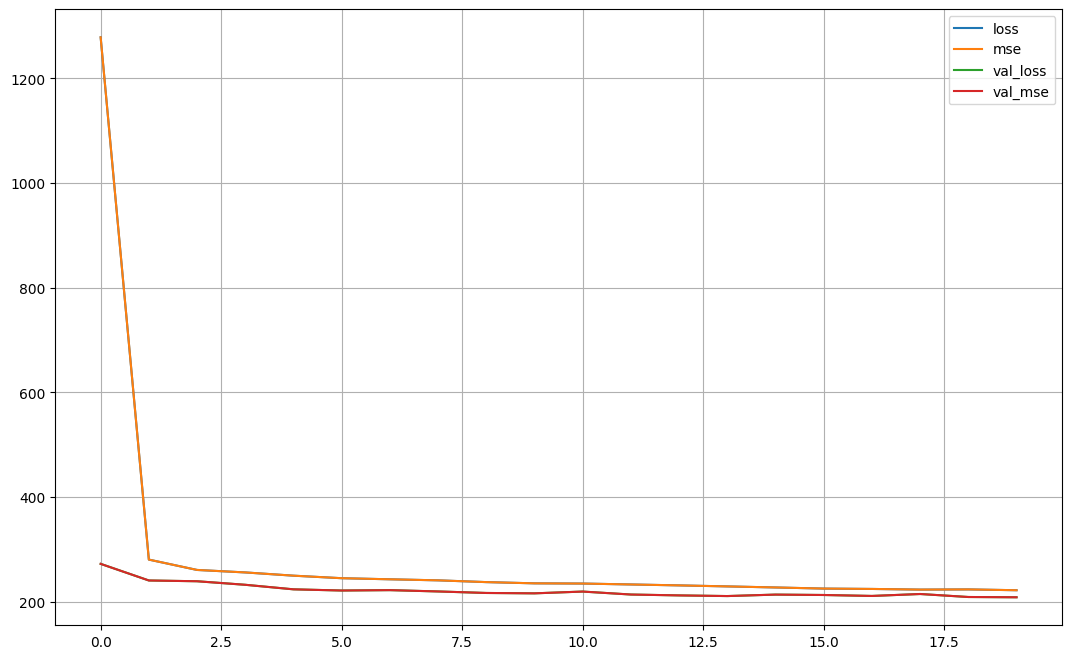

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [ ]:
#проверка на тестовых данных
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 231.5108 - mse: 231.5108


[231.51084899902344, 231.51084899902344]

In [ ]:
#предсказание
y_pred = model.predict(X_test)
y_pred[:10]

32/32 [==============================] - 0s 1ms/step


array([[71.620384],
       [83.18433 ],
       [61.788475],
       [55.434834],
       [85.10793 ],
       [63.822502],
       [68.87684 ],
       [69.29553 ],
       [78.045876],
       [81.10668 ]], dtype=float32)

In [ ]:
true_vs_pred = pd.DataFrame({'Истинные': y_test, 'Предсказанные': y_pred.reshape(-1)})

import plotly.graph_objects as go
import numpy as np

random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные'],
                    mode='lines+markers',
                    name='предсказанные'))

fig.show()

In [ ]:
#сравнить с catboost и linreg

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_reg=regressor.predict(X_test)
y_pred_reg[:10]

array([74.19951785, 86.1076734 , 70.52511227, 51.98637786, 82.8966396 ,
       61.90212752, 70.11527644, 77.27138171, 75.37743891, 75.08307253])

In [ ]:
true_vs_pred = pd.DataFrame({'Истинные': y_test, 'Предсказанные_регр': y_pred_reg,'Предсказанные_сетка': y_pred.reshape(-1)})

In [ ]:
import plotly.graph_objects as go

random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_регр'],
                    mode='lines+markers',
                    name='Регр'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_сетка'],
                    mode='lines+markers',
                    name='Сетка'))

fig.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test,y_pred.reshape(-1))
print('Коэффициент детерминации сетка:',r2)

Коэффициент детерминации сетка: 0.10396926037232934


In [ ]:
r2 = r2_score(y_test,y_pred_reg)
print('Коэффициент детерминации reg:',r2)

Коэффициент детерминации reg: 0.25548877678321036


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=123)

booster = CatBoostRegressor(iterations=100, verbose=10)

booster.fit(X_train, y_train, eval_set=(X_test, y_test))
booster.set_feature_names(X.columns)

Learning rate set to 0.248795
0:	learn: 15.7325507	test: 15.3416404	best: 15.3416404 (0)	total: 2.19ms	remaining: 217ms
10:	learn: 13.4433462	test: 13.7582252	best: 13.7582252 (10)	total: 22.2ms	remaining: 180ms
20:	learn: 13.0412311	test: 13.6520448	best: 13.6352136 (17)	total: 54ms	remaining: 203ms
30:	learn: 12.8291793	test: 13.6336450	best: 13.6336450 (30)	total: 81.1ms	remaining: 181ms
40:	learn: 12.5648117	test: 13.6862644	best: 13.6313662 (31)	total: 111ms	remaining: 159ms
50:	learn: 12.2525064	test: 13.7679328	best: 13.6313662 (31)	total: 160ms	remaining: 154ms
60:	learn: 11.9995356	test: 13.7766283	best: 13.6313662 (31)	total: 183ms	remaining: 117ms
70:	learn: 11.7668421	test: 13.8000018	best: 13.6313662 (31)	total: 210ms	remaining: 85.7ms
80:	learn: 11.5794369	test: 13.8116118	best: 13.6313662 (31)	total: 254ms	remaining: 59.6ms
90:	learn: 11.3683926	test: 13.8066414	best: 13.6313662 (31)	total: 276ms	remaining: 27.3ms
99:	learn: 11.2514683	test: 13.8371275	best: 13.6313662 (

In [ ]:
y_pred_booster = booster.predict(X_test)

In [ ]:
true_vs_pred['Предсказанные_сat']=y_pred_booster

In [ ]:


random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_регр'],
                    mode='lines+markers',
                    name='Регр'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_сетка'],
                    mode='lines+markers',
                    name='Сетка'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные_сat'],
                    mode='lines+markers',
                    name='catka'))

fig.show()

In [ ]:
r2 = r2_score(y_test,y_pred_booster)
print('Коэффициент детерминации reg:',r2)

Коэффициент детерминации reg: 0.2981168947149839
